# data: past present future
## lab 10b: trees and forests

### supervised learning

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

Illustrate the standard scikit pipeline for training models.

Our dataset:

https://archive.ics.uci.edu/ml/datasets/Hepatitis

The attributes are:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes 


In [2]:
names=['CLASS','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [4]:
hep_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', sep=',', header=None, na_values="?")

In [5]:
# works better if extract from pandas dataframe
# separate the existing classification (the diagnosis) from the features tested
hep_data_array=hep_data.values
y = hep_data_array[:,0]   #diagnosis
X = hep_data_array[:,1:19]  #features

In [25]:
hep_data[50:60]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
50,2,39,1,1.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,85.0,60.0,4.0,NaN,1
51,2,39,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,20.0,4.0,NaN,1
52,2,44,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,110.0,145.0,4.4,70.0,1
53,2,40,1,2.0,1,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.2,85.0,31.0,4.0,100.0,1
54,2,30,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,50.0,78.0,4.2,74.0,1
55,2,37,1,1.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.8,92.0,59.0,NaN,NaN,1
56,2,34,1,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
57,2,30,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,52.0,38.0,3.9,52.0,1
58,2,64,1,2.0,1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,80.0,38.0,4.3,74.0,1
59,2,45,2,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,85.0,75.0,NaN,NaN,1


This data has a problem: lots of question marks, imported as "NaN"s. scikit learn no friend of NaNs

In [6]:
#dodgy data munging!
#impute values to missing ones by using mean values of testing results. This may be a total garbage move. Is it?
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X_imputed=imp.transform(X)

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

We need to pick out a subset of our data to "train" the model, and a subset to "test" the model. 

There are loads of ways to do this, but `sklearn` offers a simple function to do so.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.45, random_state=42)

Now we set up our classifier and fit the data using it.

In [9]:
dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on all the data


We can do a little bit of testing to see how well the classifier predicts using cross validation of the testing data.

In [10]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(clf, X_train, y_train)
scores_test = cross_val_score(clf, X_test, y_test)

In [11]:
scores_train

array([0.75862069, 0.82758621, 0.81481481])

In [12]:
scores_test

array([0.58333333, 0.73913043, 0.82608696])

Decision trees are cool in part because they "rate an A+ on interpretability" according to Breiman.

Let's see why.

In [15]:
#this may take FOREVAH in class OR MAY NOT WORK

!conda install -y graphviz

Solving environment: done

# All requested packages already installed.



In [16]:
!conda install -y pydotplus

Solving environment: done

# All requested packages already installed.



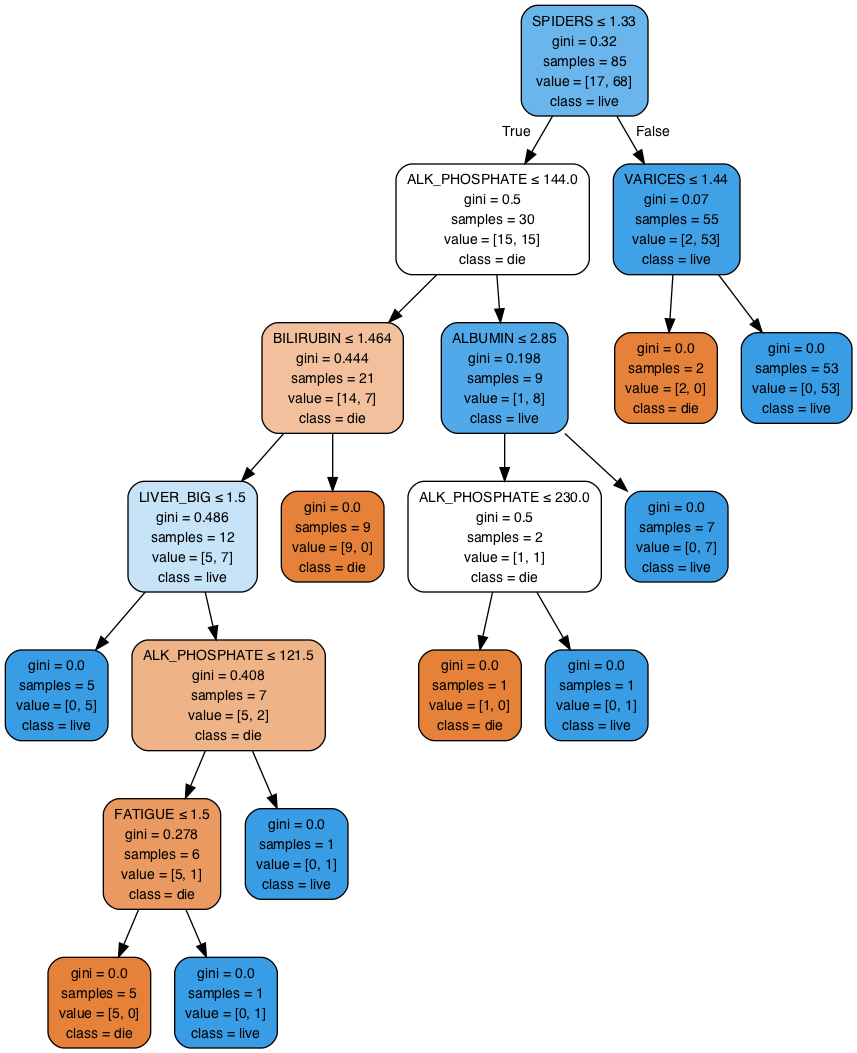

In [17]:
# show us the graph of the trees

from IPython.display import Image 
import pydotplus 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=names[1:19],  
                     class_names=['die', 'live'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Splitting Criterion

What is gini, I hear you cry. 

It's the *splitting criterion* that the decision tree algorithm defaults to.

[Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

"Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset."

To compute Gini impurity for a set of items with $J$ classes, suppose $i \in \{1, 2, ...,J\}$, and let $f_i$ be the fraction of items labeled with class $i$ in the set.

$I_{G}(f) = \sum_{i=1}^{J} f_i (1-f_i) = \sum_{i=1}^{J} (f_i - {f_i}^2) = \sum_{i=1}^J f_i - \sum_{i=1}^{J} {f_i}^2
 = 1 - \sum^{J}_{i=1} {f_i}^{2} = \sum_{i\neq k}f_i f_k$

## Overfitting

trees are very prone to *overfitting* 

![overfitting](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)


among the many techniques for dealing with this:

- constrain the depth of the trees using `max_depth=` 
- reduce the number of features training on
- random sampling


Take five minutes to change the default settings--can you make a more predictive decision tree?

In [18]:
DecisionTreeClassifier??

## Random forests

dramatically increase predictive power at the cost of interpretability

combine 

![forests](https://dimensionless.in/wp-content/uploads/RandomForest_blog_files/figure-html/voting.png)

In [19]:
# Build a forest and compute the feature importances
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
forest = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
clf=forest.fit(X_train, y_train)

In [20]:
scores = cross_val_score(clf, X_test, y_test)

In [21]:
scores

array([0.79166667, 0.86956522, 0.82608696])

Breiman:

>...forests are A+ predictors But their mechanism for producing a prediction is difficult to understand. Trying to delve into the tangled web that generated a plurality vote from 100 trees is a Herculean task. So on interpretability they rate an F.